In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)

/Users/hardiksharma/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Step 1 : Load the iris dataset

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
## IRIS DATASET DESCRIPTION
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

## Step 2 : Divide the data into dependent and independent features

In [4]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## Step 3 : Divide the data into training and testing

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


### Note : For decision tree, we do not need to perform Standardization/Normalization

## Step 4 : Load the Decision Tree model

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

## Step 5 : Visualizing our decision tree

[Text(0.5416666666666666, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [41, 39, 40]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5, 0.8571428571428572, 'True  '),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 79\nvalue = [0, 39, 40]'),
 Text(0.5833333333333333, 0.8571428571428572, '  False'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.172\nsamples = 42\nvalue = [0, 38, 4]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.65\ngini = 0.095\nsamples = 40\nvalue = [0, 38, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 4.9\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.25, 0.21428571428571427, 'x[2] <= 5.05\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0,

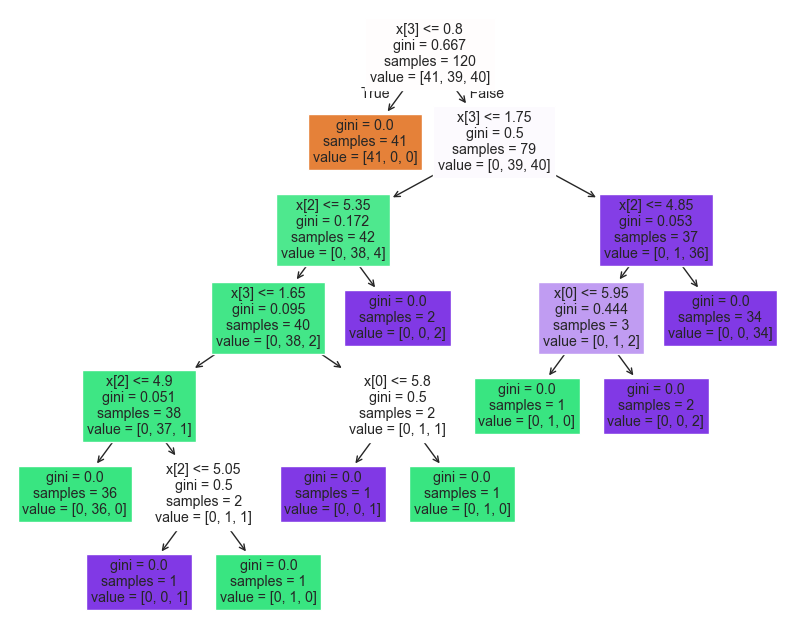

In [7]:
# VISUALIZE THE RESULTING DECISION TREE
from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(dtclassifier,filled=True)

In [8]:
y_pred = dtclassifier.predict(X_test)

## Step 6 : Performance Metrics

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(score)
print(cm)
print(classification_report(y_test, y_pred))

0.9666666666666667
[[ 9  0  0]
 [ 0 11  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        11
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Step 7 : Try Post-pruning/ Pre-pruning techniques

### Step 7.1 : Post-pruning Techniques

0.6333333333333333
[[ 9  0  0]
 [ 0  0 11]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.00      0.00      0.00        11
           2       0.48      1.00      0.65        10

    accuracy                           0.63        30
   macro avg       0.49      0.67      0.55        30
weighted avg       0.46      0.63      0.52        30



/Users/hardiksharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hardiksharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hardiksharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

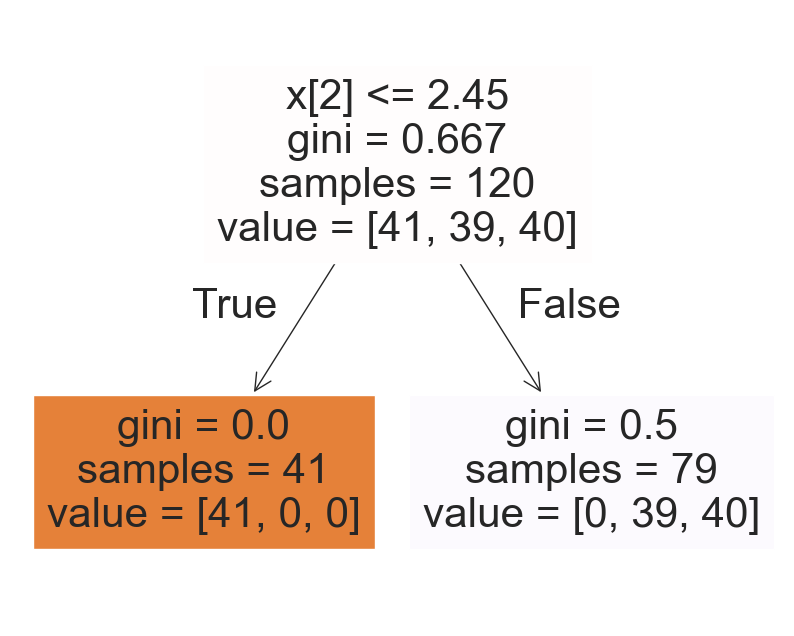

In [10]:
## FOR EXAMPLE AFTER SEEING THE ABOVE DECISION TREE WE DECIDED THAT WE WANT IT ONLY TO BE AT MAX DEPTH=2
## SO THIS IS CALLED POST PRUNING WHERE WE FIRST CONSTRUCT A TREE AND THEN SEE WHAT IS THE CUTTING DEPTH

dtclassifier_pruned = DecisionTreeClassifier(max_depth=1)
dtclassifier_pruned.fit(X_train,y_train)

plt.figure(figsize=(10,8))
tree.plot_tree(dtclassifier_pruned,filled=True)

y_pred_pruned = dtclassifier_pruned.predict(X_test)

score_pruned = accuracy_score(y_test, y_pred_pruned)
cm_pruned = confusion_matrix(y_test, y_pred_pruned)

print(score_pruned)
print(cm_pruned)
print(classification_report(y_test, y_pred_pruned))

### Step 7.2 : Pre-pruning Techniques (Hyperparameter Tuning)

In [11]:
params = {
    
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : [ 'best', 'random'],
    'max_depth' : [1,2,3,4,5,6],
    'max_features' : ['auto', 'sqrt', 'log2'],
}

In [12]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtclassifier, param_grid = params, cv=5, scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [13]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'splitter': 'best'}
0.95


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_tuned = grid.predict(X_test)

score_tuned = accuracy_score(y_test, y_pred_tuned)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

print(score_tuned)
print(cm_tuned)
print(classification_report(y_test, y_pred_tuned))

0.9666666666666667
[[ 9  0  0]
 [ 0 11  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        11
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

